In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns



/home/ankur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [94]:
data = pd.read_csv('ml1data.train.txt',header=None)

In [95]:
del data[3]

In [96]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
encoded_data, encoders = number_encode_features(data)

In [97]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data.iloc[:,0:21], encoded_data.iloc[:,-1], train_size=0.90)
scaler = preprocessing.StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
from sklearn.neural_network import MLPClassifier

In [100]:
mlp = MLPClassifier(hidden_layer_sizes=(20,15,10))

In [101]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [102]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[32  0]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        32
          1       1.00      1.00      1.00        19

avg / total       1.00      1.00      1.00        51



F1 score: 1.000000


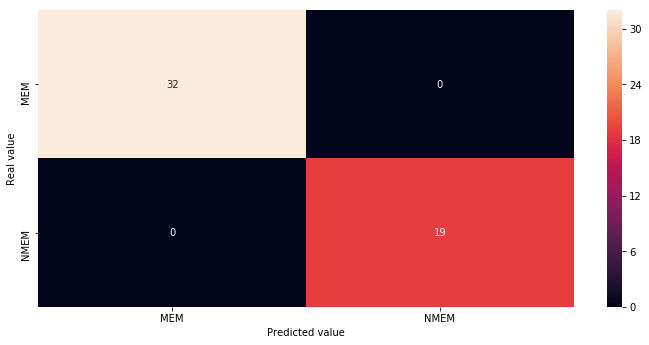

In [103]:
import matplotlib.pyplot as plt
y_pred = mlp.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders[21].classes_, yticklabels=encoders[21].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
plt.show()

F1 score: 0.000000


/home/ankur/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


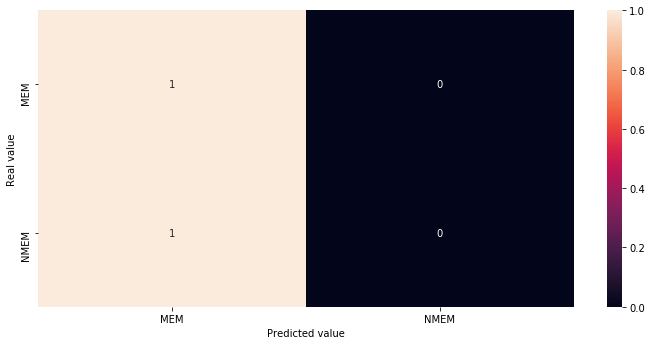

In [105]:
test_data = pd.read_csv('test_data.txt',header=None)
del test_data[3]
encoded_test_data , encoders_test = number_encode_features(test_data)
test_x = encoded_test_data.iloc[:,0:21]
test_y = encoded_test_data.iloc[:,-1]
y_pred = mlp.predict(test_x)
cm = metrics.confusion_matrix(test_y, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders[21].classes_, yticklabels=encoders[21].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(test_y, y_pred))
plt.show()

In [106]:
test_x

,0,1,2,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1,200,0,0,7.79,0,0,88,0,1,...,0,124.00,1,0,108642,1,87.00,0,1,1
1,0,966,0,1,22.63,0,1,88,0,0,...,1,171.97,0,1,108642,0,71.81,1,0,0
